In [39]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.utils import util

In [40]:
side = 10

In [41]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
output_dir = os.path.join(pipeline_dir, '04')
# output_dir = os.path.join(config.machine.pipeline_dir, '04_test')
file_list = glob(output_dir + '/**/galsim_*.npy')[:side ** 2]
pandeia_list = [np.load(i) for i in file_list]

In [42]:
file_list = sorted(glob(output_dir + '/**/galsim_*_F106.npy'))[:side ** 2]
f106_list = [np.load(i) for i in file_list]

file_list = sorted(glob(output_dir + '/**/galsim_*_F129.npy'))[:side ** 2]
f129_list = [np.load(i) for i in file_list]

file_list = sorted(glob(output_dir + '/**/galsim_*_F184.npy'))[:side ** 2]
f184_list = [np.load(i) for i in file_list]

In [43]:
f106_negatives = np.any(np.asarray(f106_list) < 0.).sum()
f129_negatives = np.any(np.asarray(f129_list) < 0.).sum()
f184_negatives = np.any(np.asarray(f184_list) < 0.).sum()

print(f'F106 negatives: {f106_negatives}')
print(f'F129 negatives: {f129_negatives}')
print(f'F184 negatives: {f184_negatives}')

F106 negatives: 0
F129 negatives: 0
F184 negatives: 0


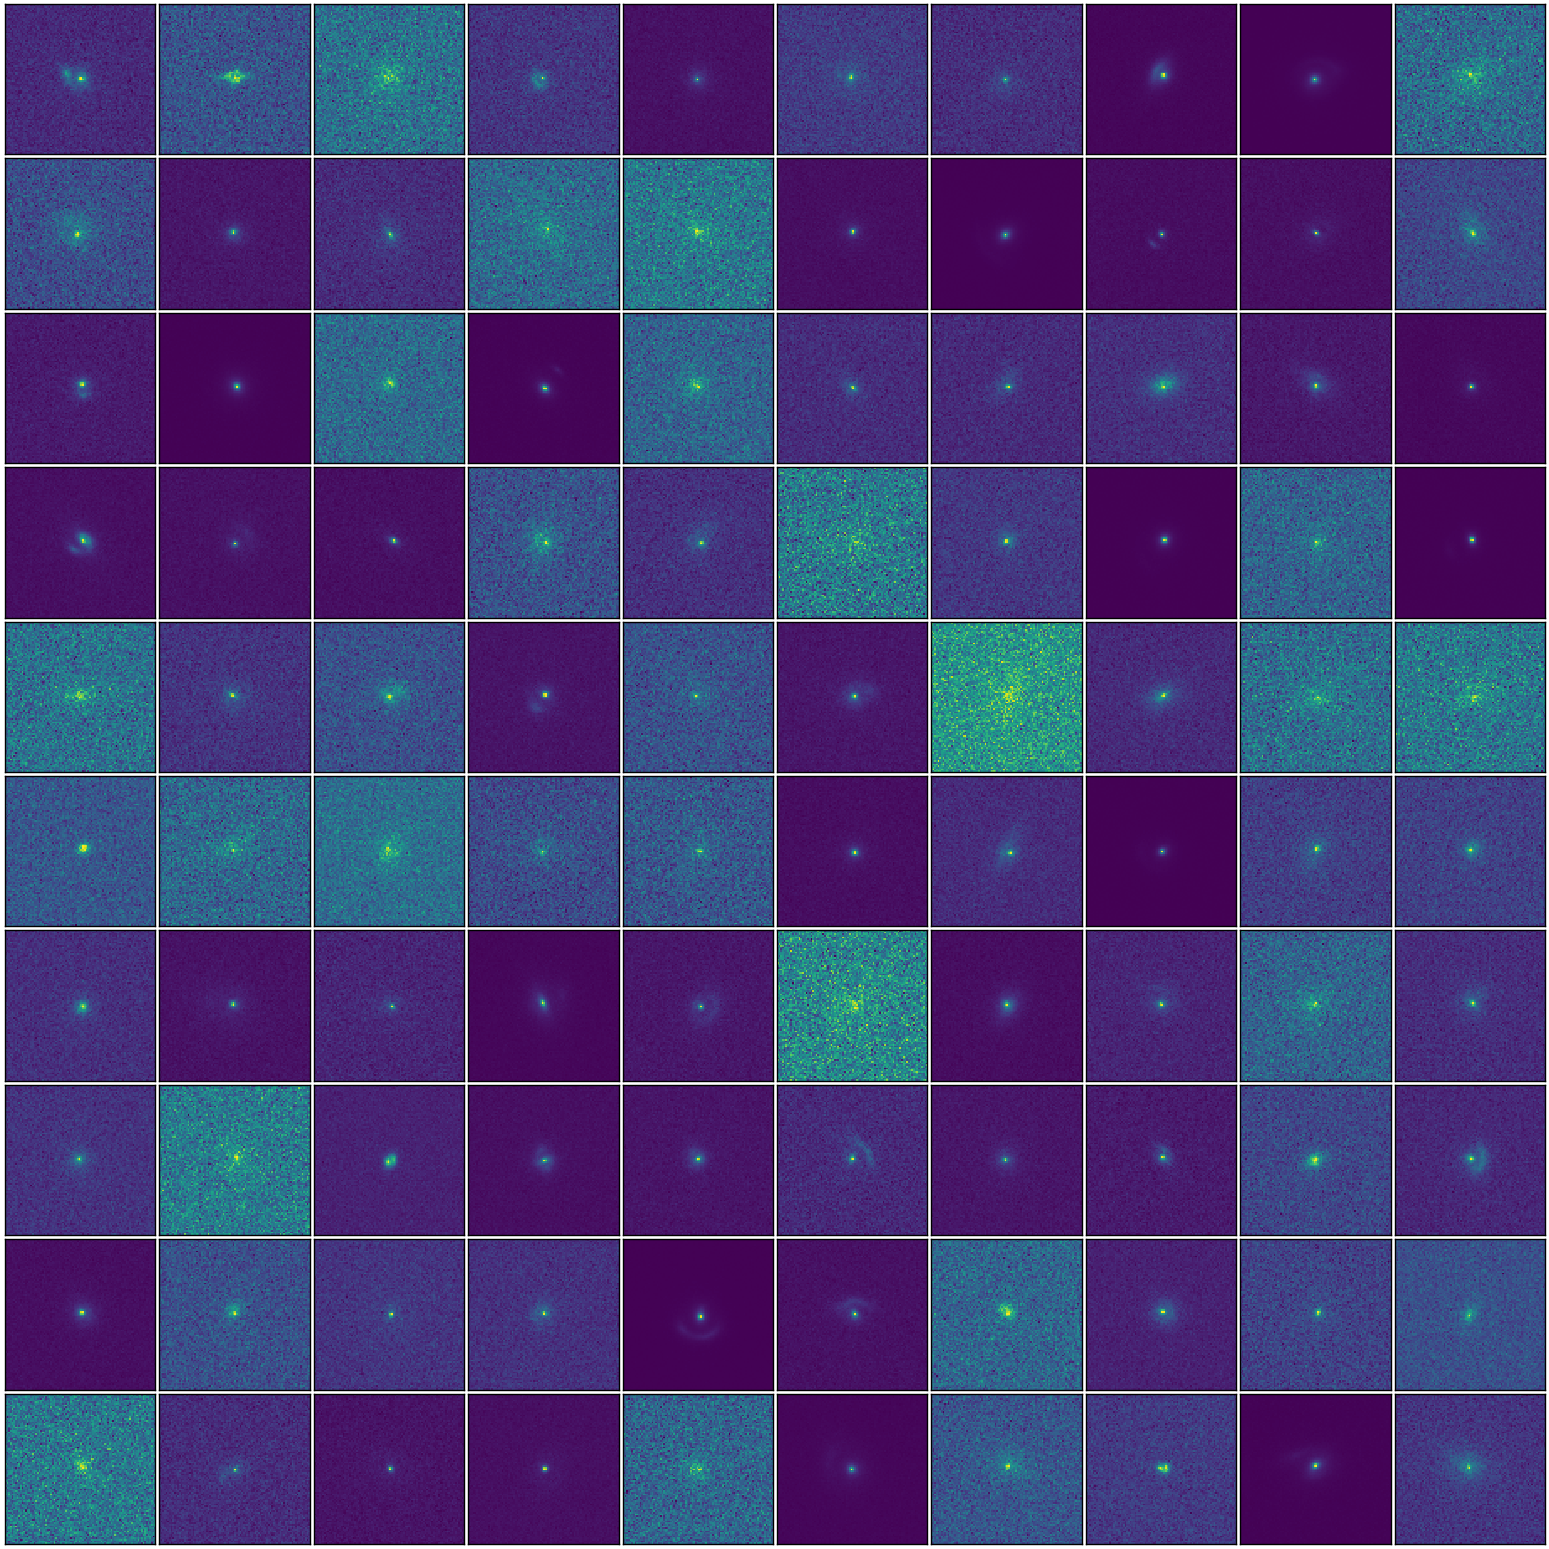

In [44]:
plot.plot_grid(f106_list, side=side, log10=False)

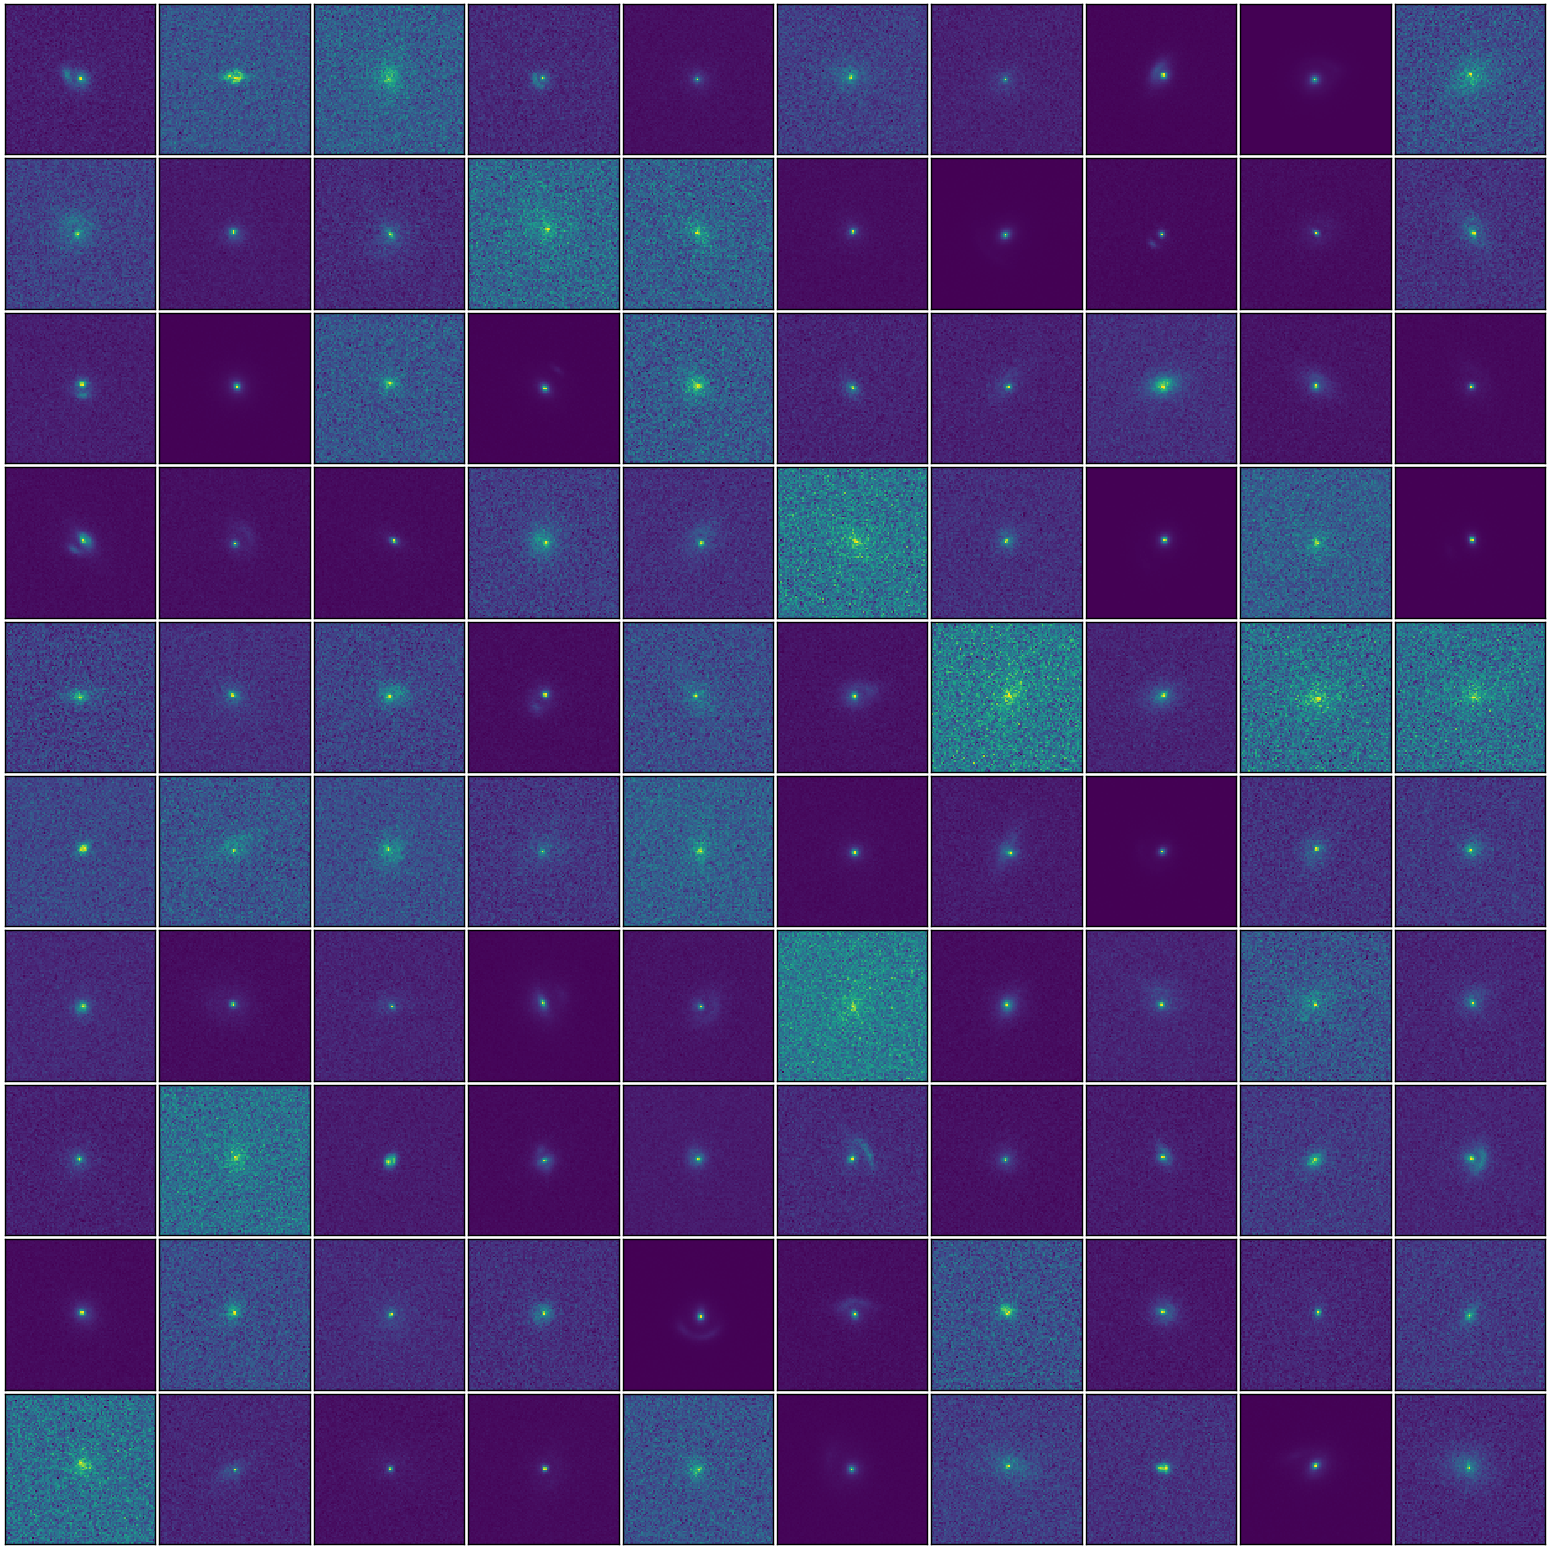

In [45]:
plot.plot_grid(f129_list, side=side, log10=False)

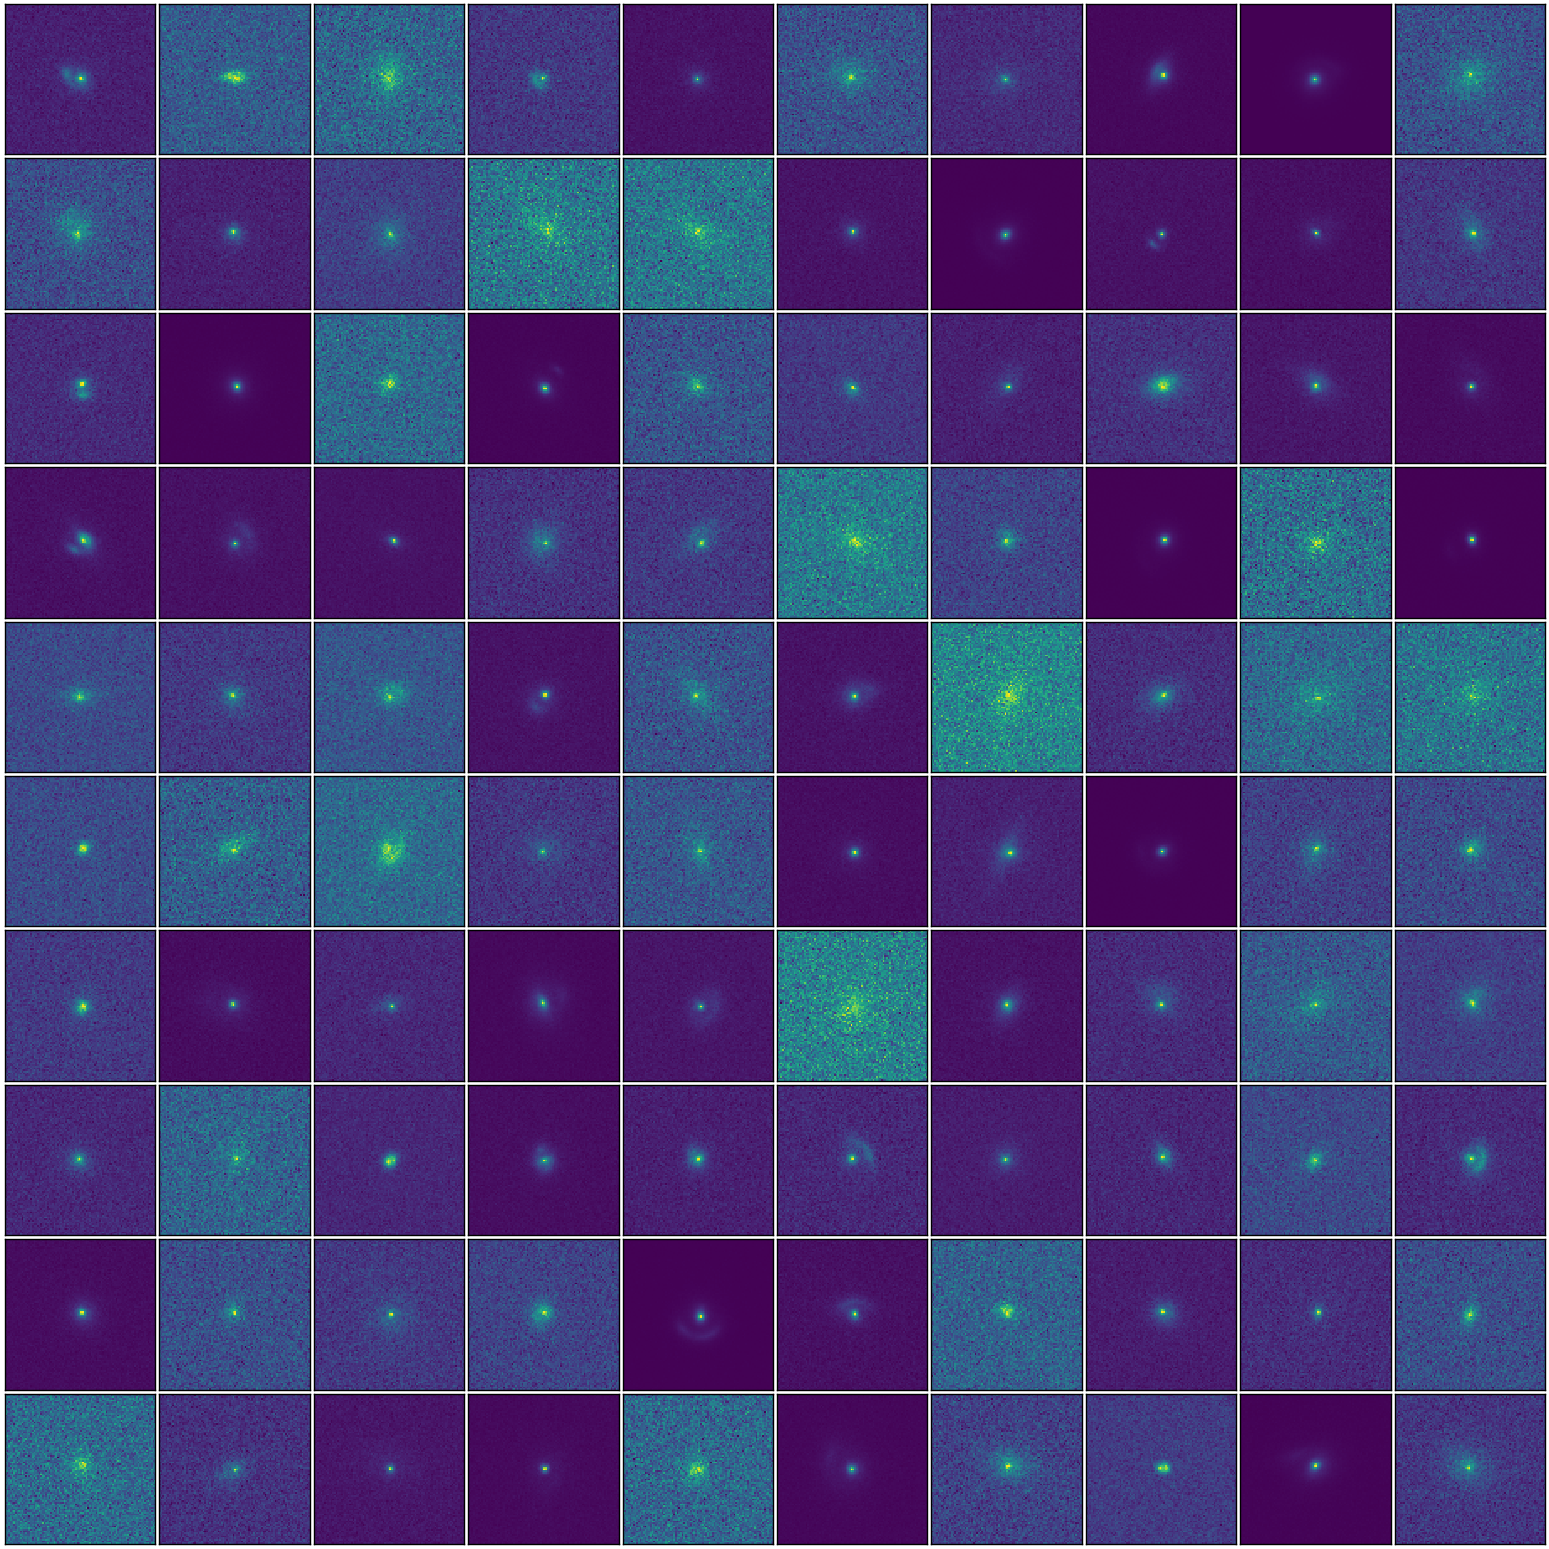

In [46]:
plot.plot_grid(f184_list, side=side, log10=False)